Опис атрибутів датасету nba:
*   Name: Ім'я гравця.
*   GP: Кількість ігор.
*   MIN: Середня кількість хвилин на майданчику.
*   PTS: Середня кількість очок за гру.
*   FGM: Середня кількість вдалих полів.
*   FGA: Середня кількість спроб на полях.
*   FG%: Відсоток вдалих полів.
*   3P Made: Середня кількість трьохочкових.
*   3PA: Середня кількість спроб трьохочкових.
*   3P%: Відсоток вдалих трьохочкових.
*   FTA: Середня кількість спроб штрафних.
*   FT%: Відсоток вдалих штрафних.
*   OREB: Середня кількість атакувальних підбирань.
*   DREB: Середня кількість захисних підбирань.
*   REB: Загальна кількість підбирань.
*   AST: Середня кількість асистів.
*   STL: Середня кількість перехоплень.
*   BLK: Середня кількість блокшотів.
*   TOV: Середня кількість втрат м'яча.
*   TARGET_5Yrs: Цільова змінна (0 — не залишиться, 1 — залишиться в НБА через 5 років).





,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

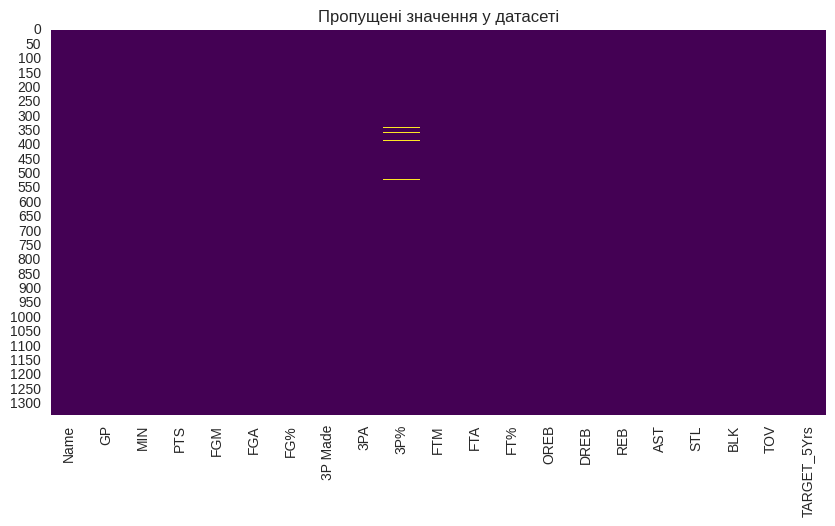

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.datasets import get_data

# Завантаження датасету
nba = get_data('nba')

# Виведення основної інформації
print(nba.info())
print(nba.describe())

# Виявлення пропущених значень
print(nba.isnull().sum())

# Візуалізація пропущених значень
plt.figure(figsize=(10,5))
sns.heatmap(nba.isnull(), cmap='viridis', cbar=False)
plt.title('Пропущені значення у датасеті')
plt.show()


**1. Класифікація (Прогнозування, чи залишиться гравець в НБА через 5 років)**

---


,Description,Value
0,Session id,123
1,Target,TARGET_5Yrs
2,Target type,Binary
3,Original data shape,"(1340, 21)"
4,Transformed data shape,"(1340, 20)"
5,Transformed train set shape,"(937, 20)"
6,Transformed test set shape,"(403, 20)"
7,Ignore features,2
8,Numeric features,19
9,Rows with missing values,0.8%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7226,0.7588,0.8261,0.7515,0.7863,0.3925,0.3988,0.9180
ridge,Ridge Classifier,0.7183,0.7593,0.8348,0.7431,0.7857,0.3783,0.3862,0.0280
lda,Linear Discriminant Analysis,0.7087,0.7583,0.8210,0.7392,0.7775,0.3591,0.3645,0.0310
et,Extra Trees Classifier,0.7066,0.7301,0.8038,0.7455,0.7728,0.3602,0.3633,0.2160
rf,Random Forest Classifier,0.7013,0.7314,0.8038,0.7391,0.7697,0.3468,0.3498,0.2990
gbc,Gradient Boosting Classifier,0.6895,0.7238,0.7935,0.7302,0.7596,0.3225,0.3270,0.4310
xgboost,Extreme Gradient Boosting,0.6798,0.6975,0.7815,0.7251,0.7507,0.3038,0.3092,0.1580
lightgbm,Light Gradient Boosting Machine,0.6777,0.7164,0.7711,0.7277,0.7474,0.3020,0.3050,0.2400
knn,K Neighbors Classifier,0.6767,0.7004,0.7677,0.7278,0.7461,0.3013,0.3041,0.0330
ada,Ada Boost Classifier,0.6649,0.7071,0.7677,0.7147,0.7395,0.2710,0.2735,0.1450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

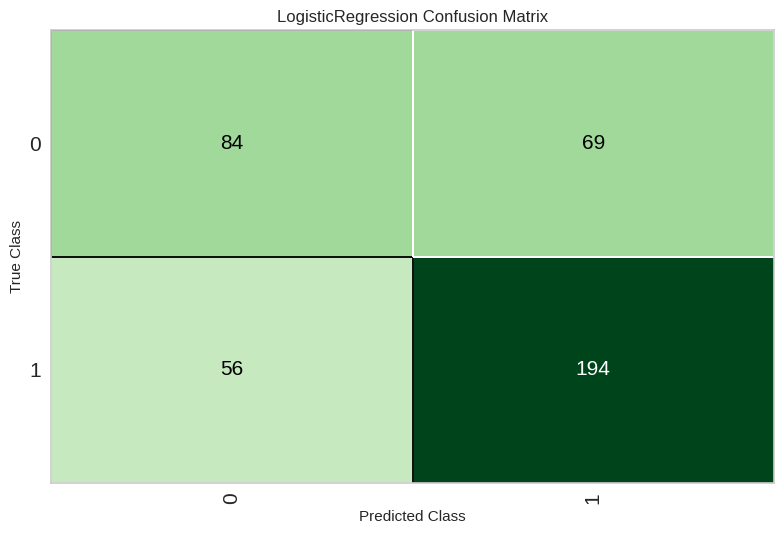

In [6]:
from pycaret.classification import setup, compare_models, plot_model

# Налаштування PyCaret
clf = setup(nba, target='TARGET_5Yrs', ignore_features=['Name', 'Team'], session_id=123)

# Порівняння моделей
best_model = compare_models()

# Візуалізація матриці помилок
plot_model(best_model, plot='confusion_matrix')

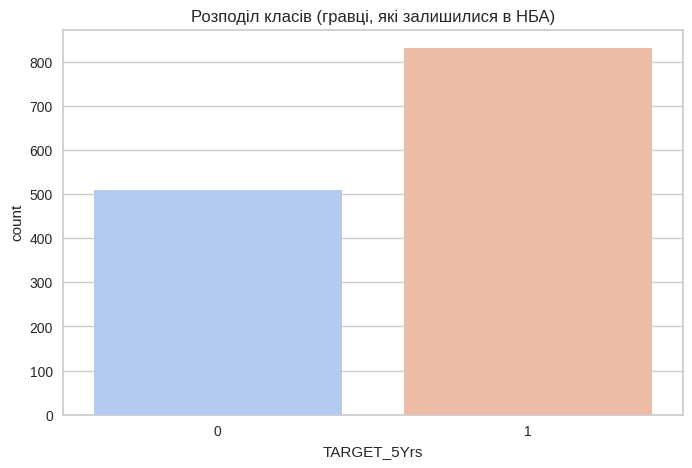

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x=nba['TARGET_5Yrs'], palette="coolwarm")
plt.title("Розподіл класів (гравці, які залишилися в НБА)")
plt.show()

**2. Регресія (Прогнозування очок гравця)**

---


,Description,Value
0,Session id,123
1,Target,PTS
2,Target type,Regression
3,Original data shape,"(1340, 21)"
4,Transformed data shape,"(1340, 20)"
5,Transformed train set shape,"(937, 20)"
6,Transformed test set shape,"(403, 20)"
7,Ignore features,2
8,Numeric features,19
9,Rows with missing values,0.8%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0578,0.0055,0.0740,0.9997,0.0139,0.0124,0.0240
ridge,Ridge Regression,0.0606,0.0059,0.0768,0.9997,0.0145,0.0129,0.0370
br,Bayesian Ridge,0.0579,0.0055,0.0740,0.9997,0.0139,0.0124,0.0240
huber,Huber Regressor,0.1242,0.0319,0.1688,0.9983,0.0237,0.0227,0.0620
gbr,Gradient Boosting Regressor,0.1447,0.0561,0.2331,0.9969,0.0250,0.0234,0.2510
et,Extra Trees Regressor,0.1709,0.0804,0.2804,0.9956,0.0310,0.0284,0.4640
xgboost,Extreme Gradient Boosting,0.1772,0.0888,0.2959,0.9951,0.0305,0.0277,0.2040
lightgbm,Light Gradient Boosting Machine,0.1785,0.1034,0.3166,0.9945,0.0303,0.0275,0.4520
rf,Random Forest Regressor,0.2163,0.1297,0.3580,0.9928,0.0373,0.0342,0.7200
dt,Decision Tree Regressor,0.3330,0.2831,0.5280,0.9846,0.0573,0.0529,0.0320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

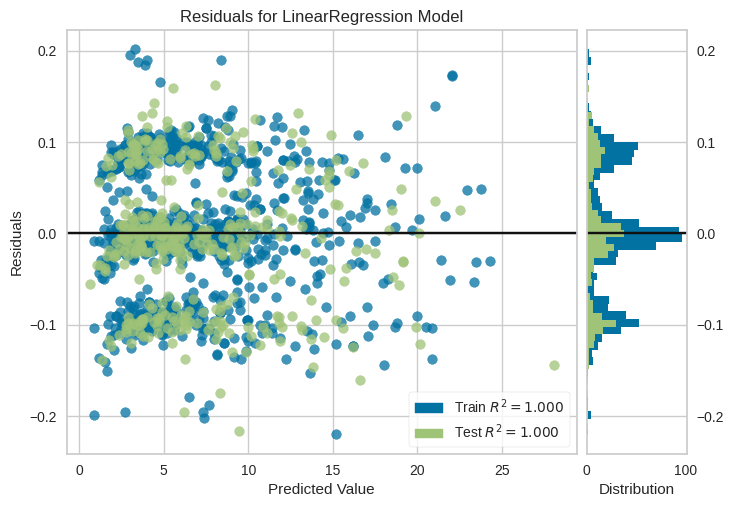

In [9]:
from pycaret.regression import setup, compare_models, plot_model

# Налаштування PyCaret
reg = setup(nba, target='PTS', ignore_features=['Name', 'Team'], session_id=123)

# Порівняння моделей
best_model = compare_models()

# Візуалізація залишків
plot_model(best_model, plot='residuals')

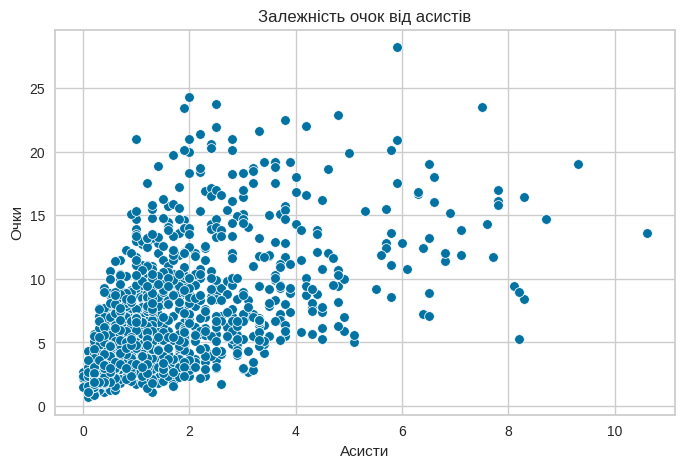

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=nba['AST'], y=nba['PTS'])
plt.title("Залежність очок від асистів")
plt.xlabel("Асисти")
plt.ylabel("Очки")
plt.show()

**3. Кластеризація (Групування гравців за показниками)**

---


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Вибір числових ознак
features = nba[['GP', 'PTS', 'REB', 'AST', 'STL', 'BLK']]

# Масштабування
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Кластеризація
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
nba['Cluster'] = kmeans.fit_predict(features_scaled)

# Оцінка кластеризації
sil_score = silhouette_score(features_scaled, nba['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.3760


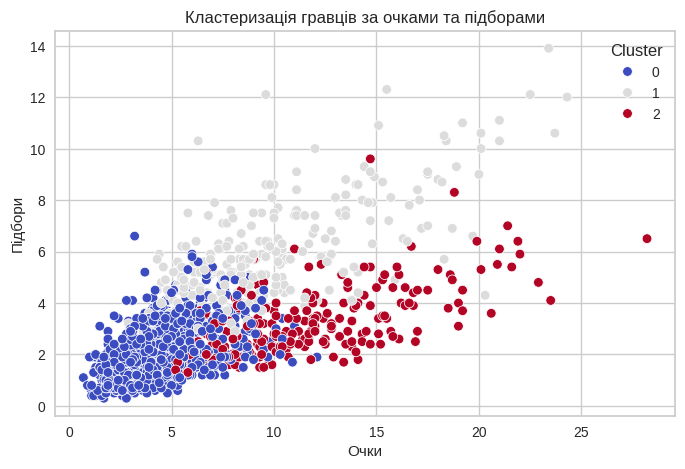

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=nba['PTS'], y=nba['REB'], hue=nba['Cluster'], palette="coolwarm")
plt.title("Кластеризація гравців за очками та підборами")
plt.xlabel("Очки")
plt.ylabel("Підбори")
plt.show()

In [13]:
from pycaret.classification import save_model
save_model(best_model, 'nba_model.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['GP', 'MIN', 'PTS', 'FGM', 'FGA',
                                              'FG%', '3P Made', '3PA', '3P%',
                                              'FTM', 'FTA', 'FT%', 'OREB',
                                              'DREB', 'REB', 'AST', 'STL', 'BLK',
                                              'TOV'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strateg...
                